# Cody Fizette 

## Homework 1

In [1]:
from hw1_code import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
matplotlib.rcParams['figure.figsize'] = [15, 10]
np.random.seed(1337)

# 2. Mathamatical Fundamentals

## 2.1 Probability

Let $(X_1, X_2, \cdots, X_d)$ have a $d$-dimensional multivariate Gaussian distribution, with mean vector $\mu \in \rm I\!R^d$ and covariance matrix $\Sigma \in \rm I\!R^{d \times d}$, i.e. $(X_1, X_2, \cdots, X_d)\sim \mathcal{N} (\mu, \Sigma)$. Use $\mu_i$ to denote the $i^{th}$ element of $\mu$ and $\Sigma_{ij}$ to denote the element at the $i^{th}$ row and $j^{th}$ column of $\Sigma$.

### 2.1.1
Let $x, y \in \!R^d$ be two independent samples drawn from $\mathcal{N} (\mu, \Sigma)$. Give expression for $E \|x\|_2^2$ and $E \|x-y\|_2^2$. Express your answer as a function of $\mu$ and $\Sigma$. $\|x\|_2$ represents the $\ell_2$-norm of vector $x$.

\begin{align}
E \|x\|_2^2 &= E\bigg(\sum_{i=1}^{d} x_i^2\bigg),\\
 &= \sum_{i=1}^{d} E (x_i^2),\\
 &= \sum_{i=1}^{d} \big( \Sigma_{i,i} + \mu_i^2 \big).
\end{align}
And 
\begin{align}
E \|x-y\|_2^2 &= E \bigg( \sum_{i=1}^{d} (x_i-y_i)^2 \bigg),\\
&= \sum_{i=1}^{d} \bigg( E(x_i)^2 - 2E(x_*y_i) + E(y_i)^2 \bigg),\\
&= \sum_{i=1}^{d} \bigg( E(x_i^2) - 2E(x_i^2) + E(x_i^2) \bigg),\\
&= 0.
\end{align}

### 2.1.2
Find the distribution of $Z = \alpha_i X_i + \alpha_j X_j$, for $i\neq j$ and $1 \leq i, j \leq d$. The answer will belong to a familiar class of distribution. Report the answer by identifying this class of distribution and specifying the parameters.

Z is normally distributed.

$Z \sim \mathcal{N} (\alpha_i \mu_i + \alpha_j \mu_j,\ \alpha_i^2\Sigma_{i,i} + \alpha_j^2\Sigma_{j,j} + 2\alpha_i\alpha_j\Sigma_{i,j})$

### 2.1.3
Assume $W$ and $R$ are two Gaussian distributed random variables. Is $W+R$ still Gaussian?

No. Proof:

Let $W \sim \mathcal{N} (\mu, \Sigma)$ Now let $R = -W$. Then it follows that $R \sim \mathcal{N} (\mu, \Sigma)$. However,
\begin{align*}
W+R &= W-W,\\
&= 0.
\end{align*}
Thus $W+R$ is not Gaussian.

## 2.2 Linear Algebra

### 2.2.1
Let $A$ be a $d\times d$ matrix with rank $k$.  Consider the set $S_A:=\{x \in \!R^d|Ax = 0\}$. What is the dimension of $S_A$?

$dim(S_A) = d-k.$

### 2.2.2
Assume $S_v$ is a $k$ dimensional subspace in  $\   \!R^d$ and $v_1,v_2,\cdots, v_k$ form an orthonormal basis of $S_v$. Let $w$ be an arbitrary vector in $\   \!R^d$. Find 
\begin{align}
x^* = \underset{x\in S_v}{\text{argmin}}\|w-x\|_2,
\end{align}
where $\|w-x\|_2$ is the Euclidean distance between $w$ and $x$. Express $x^*$ as a function of $v_1, v_2, \dots, v_k$ and $w$

Solution
\begin{align}
x^* &= \underset{x\in S_v}{\text{argmin}}\|w-x\|_2,\\
&= proj_{s_v}(w),\\
&= \sum_{i=1}^d\frac{w \cdot v_i}{v_i \cdot v_i}w_i
\end{align}

# 3. Linear Regression

## 3.2 Gradient Descent Setup

### 3.2.1

\begin{align}
J(\theta) = \frac{1}{m}(X^T\theta - y)^T(X^T\theta - y)
\end{align}

### 3.2.2

\begin{align}
\nabla J(\theta) = \frac{2}{m}(X^T\theta - y)^TX
\end{align}

### 3.2.3

\begin{align}
J(\theta + \eta h) - J(\theta) \approx J(\theta) + \eta h^T \nabla J(\theta)
\end{align}

### 3.2.4

\begin{align}
\theta \leftarrow \theta - \eta \nabla J(\theta)
\end{align}

### Some helper functions

In [3]:
def add_bias(X, b=1):
    n = X.shape[0]
    bias = b*np.ones((n,1))
    return np.hstack((bias, X))

In [4]:
def load_data(train_size=0.8):
    df = pd.read_csv('data.csv').values
    train, test = train_test_split(df, train_size=train_size)
    train, test = feature_normalization(train, test)
    X = train[:, :-1]
    y = train[:,-1]
    X_test = test[:,:-1]
    y_test = test[:,-1]
    return X, y, X_test, y_test


In [5]:
X, y, _, __ = load_data(train_size=0.99)

/home/cfizette/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
X = add_bias(X)

## 3.4 Batch Gradient Descent

In [7]:
batch_alphas = [0.5, 0.1, 0.05, 0.01, 0.00005]
theta_hists = []
loss_hists = []
for alpha in batch_alphas:
    theta_hist, loss_hist = batch_grad_descent(X, y, alpha=alpha, num_step=1000, grad_check=False)
    theta_hists.append((theta_hist, alpha))
    loss_hists.append((loss_hist, alpha))

/home/cfizette/anaconda3/envs/ml/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/cfizette/NYU/NYU-Data-Science/DS-1003/hw/hw1/hw1_code.py:62: RuntimeWarning: overflow encountered in square
  return np.mean(np.square(y - y_pred))


### 3.4.2

Text(0, 0.5, 'Average Square Loss')

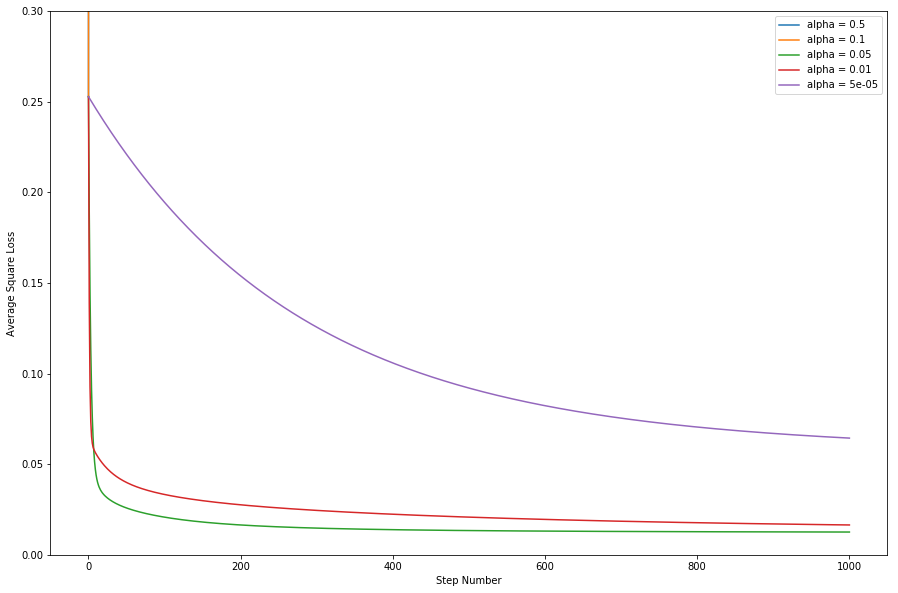

In [8]:
for loss_hist, alpha in loss_hists:
    plt.plot(loss_hist, label='alpha = {}'.format(alpha))
plt.ylim(0,0.3)
plt.legend()
plt.xlabel('Step Number')
plt.ylabel('Average Square Loss')

Step sizes above 0.05 resulted in divergence.

### 3.4.3

In [9]:
%timeit backtracking_line_search(X, y, c=0.01, b=0.5, num_step=1000)

262 ms ± 43.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%timeit batch_grad_descent(X, y, alpha=0.1, num_step=1000, grad_check=False)

43.8 ms ± 1.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
hist_backtrack, loss_hist_backtrack = backtracking_line_search(X, y, max_alpha=1, c=0.01, b=0.1, num_step=1000)

In [12]:
theta_hist, loss_hist = batch_grad_descent(X, y, alpha=0.01, num_step=1000, grad_check=False)

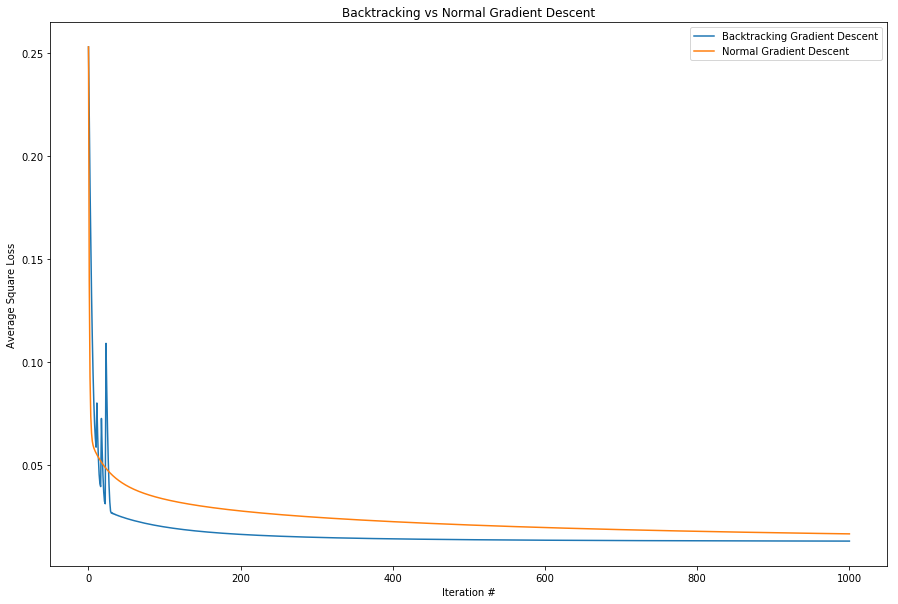

In [13]:
plt.plot(loss_hist_backtrack, label='Backtracking Gradient Descent')
plt.plot(loss_hist, label='Normal Gradient Descent')
plt.title("Backtracking vs Normal Gradient Descent")
plt.xlabel('Iteration #')
plt.ylabel('Average Square Loss')
plt.legend()

The backtracking algorithm is about 6x slower to run 1000 iterations. It is worth noting that the backtracking algorithm slows down as it approaches the optimal solution. This is due to the algorithm needing more iterations to shrink the step size to an appropriate level. However, in terms of iterations, the backtracking algorithm much faster. After 1000 iterations, the normal gradient descent algorithm performs about as well as the backtracking algorithm does in 50 iterations. 

## 3.5 Ridge Regression

### 3.5.1

\begin{align}
\nabla J(\theta) = \frac{1}{m} (X\theta - y)^TX + 2\lambda \theta^T\\
\theta \leftarrow \theta - \alpha \nabla J(\theta)
\end{align}

### 3.5.4

Increasing the value of B results in the bias term having a lower coefficient. This decreases the amount that the bias contributes to the overall loss.

### 3.5.5

### 3.5.6

In [14]:
X, y, X_test, y_test = load_data()

In [15]:
Bs = [1,2,3,4,5,6,7,8,9,10]
test_losses = []
for B in Bs:
    X_ = add_bias(X, b=B)
    X_test_ = add_bias(X_test, b=B)
    theta_hist, loss_hist = regularized_grad_descent(X_, y, alpha=0.01)
    theta = theta_hist[-1]
    test_losses.append(compute_square_loss(X_test_, y_test, theta))
    
    

In [16]:
test_losses

[0.027767567458916852,
 0.02704512786076287,
 0.026916670073004696,
 0.026873360766006098,
 0.026853768609246494,
 0.026843265680191308,
 0.026836983619430516,
 0.026832927574705828,
 0.02683015665211446,
 5.295606270673492e+210]

Test set performance was best when B=9. Beyond that loss increased rapidly.

### 3.5.7

In [17]:
# Reload fresh data
X, y, X_test, y_test = load_data()
# Set B=1 
X_ = add_bias(X, b=1)
X_test_ = add_bias(X_test, b=1)

In [18]:
lambdas = [1e-7, 1e-5, 1e-3, 1e-1, 1, 10]
train_losses = []
test_losses = []

In [19]:
for l in lambdas:
    theta_hist, loss_hist = regularized_grad_descent(X_, y, alpha=0.01, lambda_reg=l)
    theta = theta_hist[-1]
    test_losses.append(compute_square_loss(X_test_, y_test, theta))
    train_losses.append(compute_square_loss(X_, y, theta))

Text(0, 0.5, 'Loss')

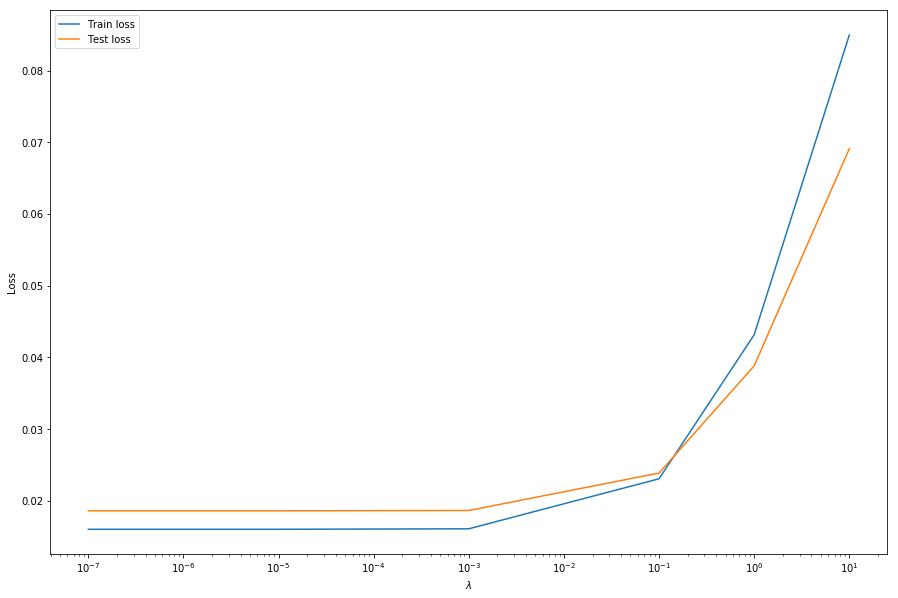

In [20]:
ax = plt.plot(lambdas, train_losses, label='Train loss')
plt.plot(lambdas, test_losses, label='Test loss')
plt.xscale('log')
plt.legend()
plt.xlabel('$\lambda$')
plt.ylabel('Loss')

In [21]:
lambdas = np.linspace(1e-3, 1e-1, 100)
train_losses = []
test_losses = []

In [22]:
for l in lambdas:
    theta_hist, loss_hist = regularized_grad_descent(X_, y, alpha=0.01, lambda_reg=l)
    theta = theta_hist[-1]
    test_losses.append(compute_square_loss(X_test_, y_test, theta))
    train_losses.append(compute_square_loss(X_, y, theta))

Text(0, 0.5, 'Loss')

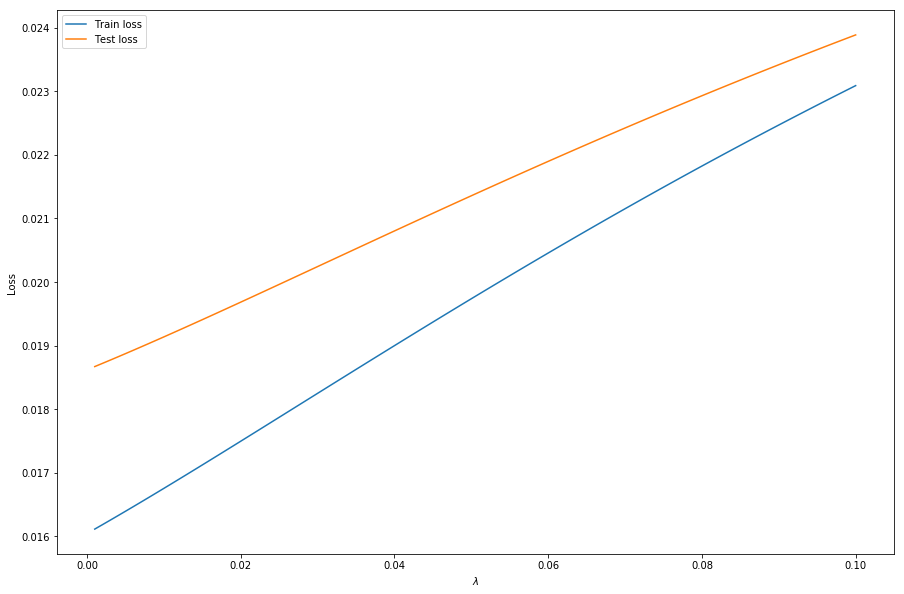

In [23]:
ax = plt.plot(lambdas, train_losses, label='Train loss')
plt.plot(lambdas, test_losses, label='Test loss')
#plt.xscale('log')
plt.legend()
plt.xlabel('$\lambda$')
plt.ylabel('Loss')

$\lambda=0$ minimizes loss on the test set. 

### 3.5.8

For deployment, I would use $\lambda=0.02$. This allows for some regularization without too much of a loss in performance.

## 3.6 Stochastic Gradient Descent

### 3.6.1

\begin{align}
f_i(\theta) = (h_{\theta}(x_i) - y)^2 + \lambda \theta^T\theta
\end{align}

### 3.6.2

Let 
\begin{align}
J(\theta) = \frac{1}{m}\sum_{i=1}^m f_i(\theta)
\end{align}

Then by taking the gradient we see that
\begin{align}
\nabla J(\theta) = \frac{1}{m}\sum_{i=1}^m \nabla f_i(\theta)
\end{align}

Now observe that
\begin{align}
\mathop{\mathbb{E}}[\nabla f_i(\theta)] &= \frac{1}{m}\sum_{i=1}^m \nabla f_i(\theta) && \text{by definition of expected value,}\\
&= \nabla J(\theta)
\end{align}

### 3.6.3

\begin{align}
\theta \leftarrow \theta - \alpha[2(x_i\theta - y_i)x_i + 2\lambda \theta]
\end{align}

### 3.6.5

In [24]:
l=0.008
B=9
# Reload fresh data
X, y, X_test, y_test = load_data()
# Set B=1 
X_ = add_bias(X, b=1)
X_test_ = add_bias(X_test, b=1)

In [25]:
test_losses=[]
train_losses=[]
ayes = [0.005, 0.05, 0.001]
for a in ayes:
    theta_hist, loss_hist = stochastic_grad_descent(X_, y, alpha=a, lambda_reg=l)
    train_losses.append(loss_hist)

/home/cfizette/NYU/NYU-Data-Science/DS-1003/hw/hw1/hw1_code.py:81: RuntimeWarning: overflow encountered in multiply
  return (2/n) * np.matmul(X.T, y_pred - y)


Text(0.5, 1.0, 'Convergence for fixed step size')

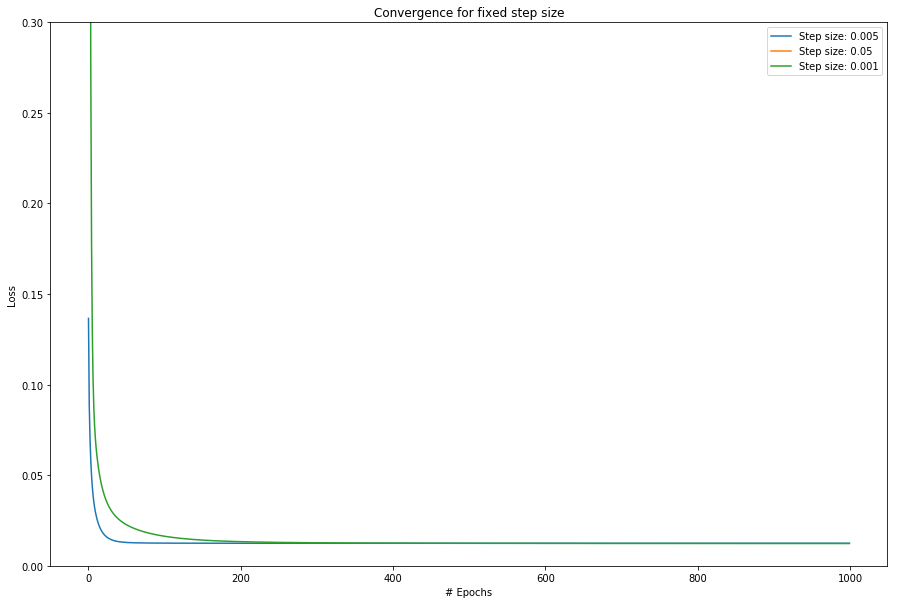

In [26]:
for a, loss in zip(ayes, train_losses):
    plt.plot(loss[:,-1], label='Step size: {}'.format(a))
plt.legend()
plt.xlabel('# Epochs')
plt.ylabel('Loss')
plt.ylim(0,0.3)
plt.title('Convergence for fixed step size')

In [27]:
test_losses=[]
train_losses=[]
ayes = ['1/sqrt(t)', '1/t']
C=0.1
for a in ayes:
    theta_hist, loss_hist = stochastic_grad_descent(X_, y, alpha=a, lambda_reg=l)
    train_losses.append(loss_hist)

Text(0.5, 1.0, 'Convergence for adaptive step size. C=0.1')

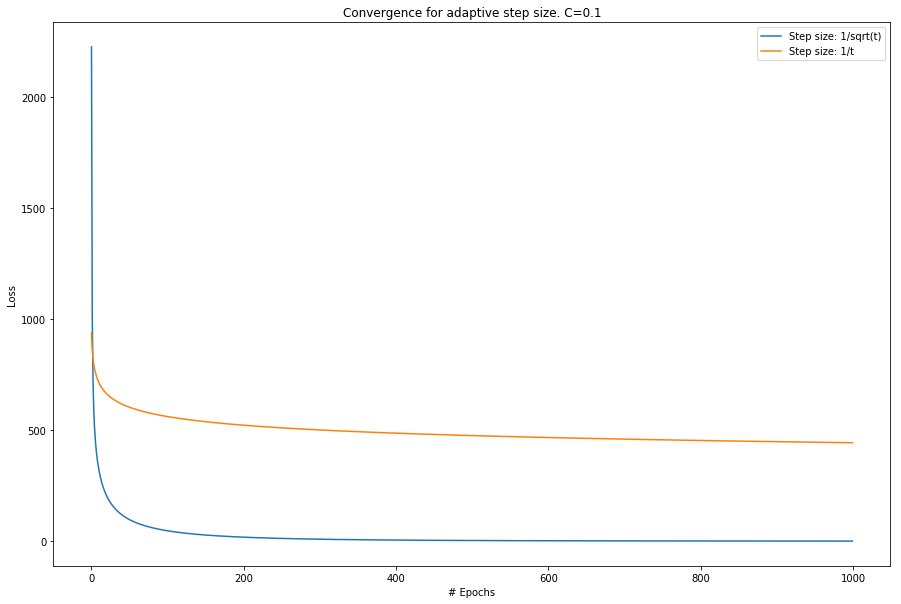

In [28]:
for a, loss in zip(ayes, train_losses):
    plt.plot(loss[:,-1], label='Step size: {}'.format(a))
plt.legend()
plt.xlabel('# Epochs')
plt.ylabel('Loss')
plt.title('Convergence for adaptive step size. C=0.1')

In [29]:
test_losses=[]
train_losses=[]
ayes = ['1/sqrt(t)', '1/t']
C=0.01
for a in ayes:
    theta_hist, loss_hist = stochastic_grad_descent(X_, y, alpha=a, lambda_reg=l, C=C)
    train_losses.append(loss_hist)

Text(0.5, 1.0, 'Convergence for adaptive step size. C=0.01')

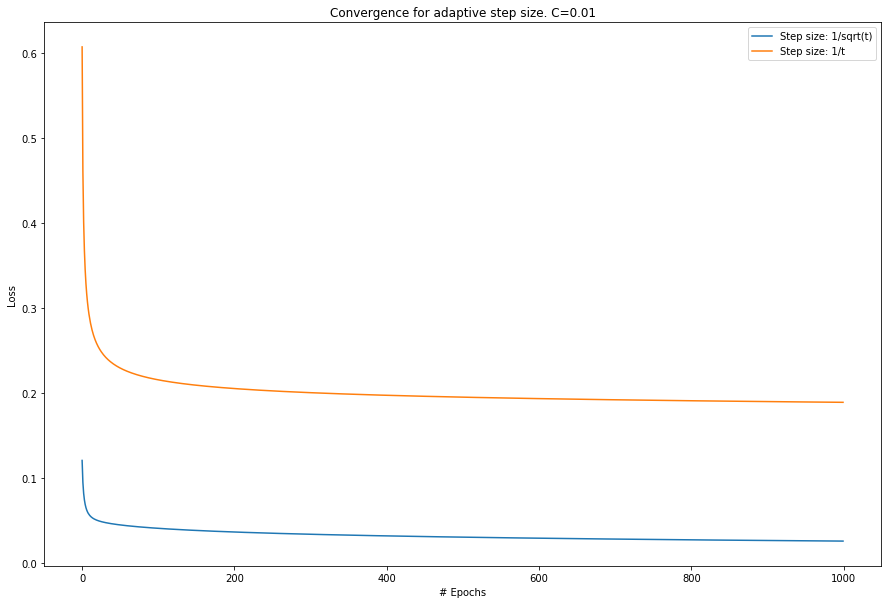

In [30]:
for a, loss in zip(ayes, train_losses):
    plt.plot(loss[:,-1], label='Step size: {}'.format(a))
plt.legend()
plt.xlabel('# Epochs')
plt.ylabel('Loss')
plt.title('Convergence for adaptive step size. C=0.01')

With a smaller value of C=0.01, convergence occurs faster.

#### Averaged SGD

In [31]:
theta, _ = stochastic_grad_descent(X_ ,y, alpha='1/sqrt(t)', C=0.01, averaged=True)
loss_averaged = compute_square_loss(X_, y, theta)
theta_hist, _ = stochastic_grad_descent(X_ ,y, alpha='1/sqrt(t)', C=0.01, averaged=False)
loss_not_averaged = compute_square_loss(X_, y, theta_hist[-1,-1,:])

print('Loss with averaging: {} \nLoss without averaging{}'.format(loss_averaged, loss_not_averaged))

Loss with averaging: 0.03135260773407746 
Loss without averaging0.025432554368879978


The averaged SGD actually performs worse in this case. 

### 3.6.6

In [32]:
l=0.008
B=9
# Reload fresh data
X, y, X_test, y_test = load_data()
# Set B=1 
X_ = add_bias(X, b=1)
X_test_ = add_bias(X_test, b=1)

In [33]:
test_losses=[]
train_losses=[]
etas = [0.005, 0.01, 0.001]
for eta in etas:
    theta_hist, loss_hist = stochastic_grad_descent(X_, y, lambda_reg=l, eta_0=eta)
    train_losses.append(loss_hist)

Text(0.5, 1.0, 'Convergence for adaptive step size. C=0.01')

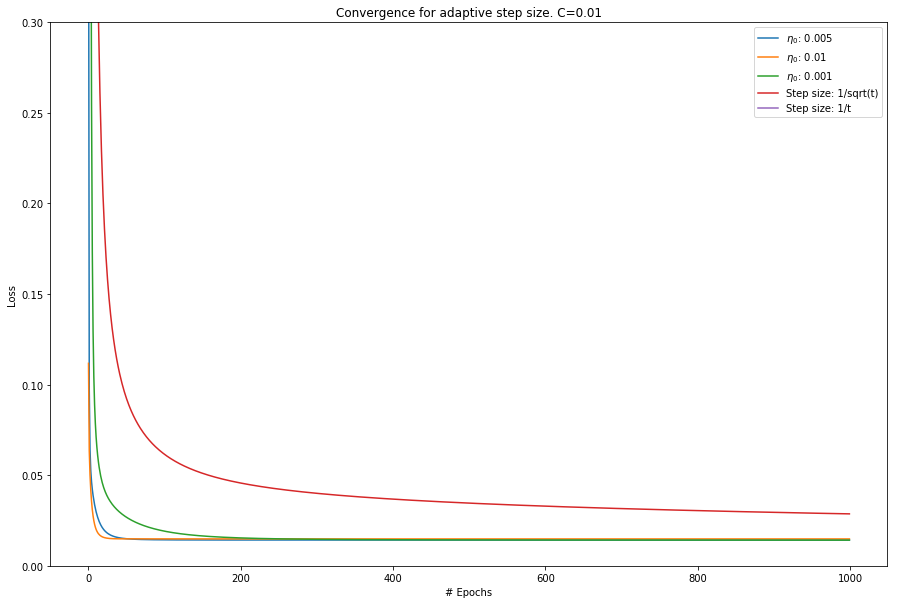

In [34]:
test_losses=[]
train_losses=[]
etas = [0.005, 0.01, 0.001]
for eta in etas:
    theta_hist, loss_hist = stochastic_grad_descent(X_, y, lambda_reg=l, eta_0=eta)
    train_losses.append(loss_hist)
    
for eta, loss in zip(etas, train_losses):
    plt.plot(loss[:,-1], label='$\eta_0$: {}'.format(eta))
plt.legend()
plt.xlabel('# Epochs')
plt.ylabel('Loss')
plt.ylim(0,0.3)
plt.title('Convergence for different values of $\eta_0$')

# Compare to other adaptive step size methods ------------------------------------------
test_losses=[]
train_losses=[]
ayes = ['1/sqrt(t)', '1/t']
C=0.01
for a in ayes:
    theta_hist, loss_hist = stochastic_grad_descent(X_, y, alpha=a, lambda_reg=l, C=C)
    train_losses.append(loss_hist)
    
for a, loss in zip(ayes, train_losses):
    plt.plot(loss[:,-1], label='Step size: {}'.format(a))
plt.legend()
plt.xlabel('# Epochs')
plt.ylabel('Loss')
plt.title('Convergence for adaptive step size. C=0.01')

This method appears to perform better than some of the other adaptive step size methods we tried, however, the difference in performance could decrease with proper parameter tuning.

# 4. Risk Minimizatiion

## 4.1 Square Loss

### 4.1.1

Find argmin by setting derivative equal to zero and solving for $a$
\begin{align}
E(\ell^\prime) &= 2E(a-y),\\
&= 2(a - Ey)\\
\end{align}
Setting this equal to 0
\begin{align}
2(a - Ey) &= 0, \\
a^* &= Ey
\end{align}

Now also observe that
\begin{align}
E(\ell(a^*-y)) &= E((a^*-y)^2)\\
&= E[(Ey-y)^2]\\
&= E[E^2y - 2yEy + y^2]\\
&= E^2y - 2E^2y + Ey^2\\
&= Ey^2 - E^2y\\
&= Var(y)
\end{align}

### 4.1.2a

\begin{align}
f^*(x) &= argmin_a E[(a-y)^2|X]\\
&= E(Y|X)
\end{align}

### 4.1.2b

\begin{align}
E[(f^*(x)-y)^2] &= E[E[f^*(x)-y)^2|X]]\\
&\leq E[E[(f(x)-y)^2|X]]\\
&= E[(f(x)-y)^2]
\end{align}
Thus,
\begin{align}
E[(f^*(x)-y)^2] \leq E[(f(x)-y)^2]
\end{align}